In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━

In [ ]:
from google.colab import files

files.upload()

Saving germany-wind-energy.csv to germany-wind-energy.csv


{'germany-wind-energy.csv': b'utc_timestamp,wind_generation_actual,wind_capacity,temperature\n2017-01-01 00:00:00+00:00,291760.0,37149.13,-2.117\n2017-01-02 00:00:00+00:00,295097.0,37152.125,-1.154\n2017-01-03 00:00:00+00:00,666170.0,37155.208,-0.239\n2017-01-04 00:00:00+00:00,686581.0,37160.125,0.62\n2017-01-05 00:00:00+00:00,261759.0,37163.542,-3.908\n2017-01-06 00:00:00+00:00,115720.0,37176.208,-7.724\n2017-01-07 00:00:00+00:00,252308.0,37181.0,-5.861\n2017-01-08 00:00:00+00:00,41260.0,37181.25,-1.616\n2017-01-09 00:00:00+00:00,190982.0,37187.458,-1.629\n2017-01-10 00:00:00+00:00,280371.0,37198.458,-2.586\n2017-01-11 00:00:00+00:00,637258.0,37209.667,-0.727\n2017-01-12 00:00:00+00:00,584792.0,37225.375,1.425\n2017-01-13 00:00:00+00:00,518614.0,37234.0,-0.231\n2017-01-14 00:00:00+00:00,487188.0,37234.0,-0.738\n2017-01-15 00:00:00+00:00,229770.0,37234.208,-2.331\n2017-01-16 00:00:00+00:00,69211.0,37239.25,-4.995\n2017-01-17 00:00:00+00:00,79360.0,37246.0,-6.056\n2017-01-18 00:00:00+00

In [ ]:
import pandas as pd
from pycaret.time_series import *

In [ ]:
!cp germany-wind-energy.csv windenergy_ts_data_set/
directory = '/content/windenergy_ts_data_set/'

In [ ]:
import pandas as pd
train_data = pd.read_csv(directory+'germany-wind-energy.csv')
train_data.head()

,utc_timestamp,wind_generation_actual,wind_capacity,temperature
0,2017-01-01 00:00:00+00:00,291760.0,37149.130,-2.117
1,2017-01-02 00:00:00+00:00,295097.0,37152.125,-1.154
2,2017-01-03 00:00:00+00:00,666170.0,37155.208,-0.239
3,2017-01-04 00:00:00+00:00,686581.0,37160.125,0.620
4,2017-01-05 00:00:00+00:00,261759.0,37163.542,-3.908


In [ ]:
train_data = pd.DataFrame(train_data).set_index('utc_timestamp')


In [ ]:
train_data.head()

,wind_generation_actual,wind_capacity,temperature
utc_timestamp,,,
2017-01-01 00:00:00+00:00,291760.0,37149.130,-2.117
2017-01-02 00:00:00+00:00,295097.0,37152.125,-1.154
2017-01-03 00:00:00+00:00,666170.0,37155.208,-0.239
2017-01-04 00:00:00+00:00,686581.0,37160.125,0.620
2017-01-05 00:00:00+00:00,261759.0,37163.542,-3.908


In [ ]:
duplicate_dates = train_data.index.duplicated()

# Print the duplicate dates
print(f"Duplicate dates:\n{train_data.index[duplicate_dates]}")


Duplicate dates:
Index([], dtype='object', name='utc_timestamp')


In [ ]:
ts = setup(data=train_data, target='wind_generation_actual', session_id=123)


TypeError: y must be in an sktime compatible format, of scitype Series, Panel, Hierarchical, for instance a pandas.DataFrame with sktime compatible time indices, or with MultiIndex and last(-1) level an sktime compatible time index. See the forecasting tutorial examples/01_forecasting.ipynb, or the data format tutorial examples/AA_datatypes_and_datasets.ipynb,If you think y is already in an sktime supported input format, run sktime.datatypes.check_raise(y, mtype) to diagnose the error, where mtype is the string of the type specification you want for y. Possible mtype specification strings are as follows: "For Series scitype: ['pd.DataFrame', 'pd.Series', 'np.ndarray']. , "For Panel scitype: ['numpy3D', 'nested_univ', 'df-list', 'pd-long', 'pd-multiindex']. , "For Hierarchical scitype: ['pd_multiindex_hier']. 

In [ ]:
print(train_data['wind_generation_actual'].dtype)

float64


In [ ]:
if not isinstance(train_data.index, pd.DatetimeIndex):
       train_data.index = pd.to_datetime(train_data.index)

In [ ]:
train_data.head()

,wind_generation_actual,wind_capacity,temperature
utc_timestamp,,,
2017-01-01 00:00:00+00:00,291760.0,37149.130,-2.117
2017-01-02 00:00:00+00:00,295097.0,37152.125,-1.154
2017-01-03 00:00:00+00:00,666170.0,37155.208,-0.239
2017-01-04 00:00:00+00:00,686581.0,37160.125,0.620
2017-01-05 00:00:00+00:00,261759.0,37163.542,-3.908


<Axes: xlabel='utc_timestamp'>

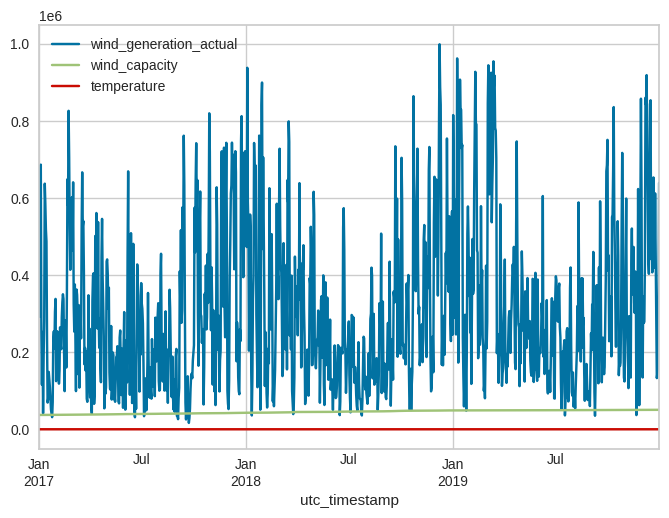

In [ ]:
train_data.plot()

In [ ]:
ts = setup(data=train_data, target='wind_generation_actual', session_id=123)


,Description,Value
0,session_id,123
1,Target,wind_generation_actual
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(1094, 3)"
5,Transformed data shape,"(1094, 3)"
6,Transformed train set shape,"(1093, 3)"
7,Transformed test set shape,"(1, 3)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
model = create_model('arima')


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2019-12-26,1.4124,1.0766,282861.4286,282861.4286,1.9296,0.9821
1,2019-12-27,0.9956,0.7591,199462.1357,199462.1357,1.2535,0.7705
2,2019-12-28,1.1422,0.8712,229004.6122,229004.6122,0.6546,0.9731
Mean,NaT,1.1834,0.9023,237109.3921,237109.3921,1.2792,0.9086
SD,NaT,0.1726,0.1315,34526.5705,34526.5705,0.5208,0.0977


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
y_predict = predict_model(model)
y_predict

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,ARIMA,1.4640,1.1161,293254.0919,293254.0919,0.4587,0.5952


,y_pred
2019-12-30,346088.9081


In [ ]:
train_data.head()

,wind_generation_actual,wind_capacity,temperature
utc_timestamp,,,
2017-01-01 00:00:00+00:00,291760.0,37149.130,-2.117
2017-01-02 00:00:00+00:00,295097.0,37152.125,-1.154
2017-01-03 00:00:00+00:00,666170.0,37155.208,-0.239
2017-01-04 00:00:00+00:00,686581.0,37160.125,0.620
2017-01-05 00:00:00+00:00,261759.0,37163.542,-3.908


In [ ]:
target = "wind_generation_actual"
exog_vars = ['wind_capacity', 'temperature']
include = [target] + exog_vars
train_data = train_data[include]
train_data.head()

,wind_generation_actual,wind_capacity,temperature
utc_timestamp,,,
2017-01-01 00:00:00+00:00,291760.0,37149.130,-2.117
2017-01-02 00:00:00+00:00,295097.0,37152.125,-1.154
2017-01-03 00:00:00+00:00,666170.0,37155.208,-0.239
2017-01-04 00:00:00+00:00,686581.0,37160.125,0.620
2017-01-05 00:00:00+00:00,261759.0,37163.542,-3.908


In [ ]:
FH=48
metric = "mase"
exclude = ["auto_arima", "bats", "tbats", "lar_cds_dt", "par_cds_dt"]

In [ ]:
exp_auto = TSForecastingExperiment()

# enforce_exogenous=False --> Use multivariate forecasting when model supports it, else use univariate forecasting
exp_auto.setup(
    data=train_data, target=target, fh=FH, enforce_exogenous=False,
    numeric_imputation_target="ffill", numeric_imputation_exogenous="ffill",session_id=42
)

,Description,Value
0,session_id,42
1,Target,wind_generation_actual
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(1094, 3)"
5,Transformed data shape,"(1094, 3)"
6,Transformed train set shape,"(1046, 3)"
7,Transformed test set shape,"(48, 3)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
best = exp_auto.compare_models(sort=metric, turbo=False, exclude=exclude)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
prophet,Prophet,0.6302,0.5672,125510.3724,147989.3328,0.6958,0.4947,-0.0260,0.6800
croston,Croston,0.6504,0.6390,129488.0284,166609.0174,0.5716,0.5134,-0.2786,0.1100
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.6652,0.6246,132576.4298,163057.3468,0.7737,0.5086,-0.2704,3.9967
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.6652,0.6246,132576.4905,163057.3677,0.7737,0.5086,-0.2704,3.3133
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.6652,0.6246,132576.4511,163057.3590,0.7737,0.5086,-0.2704,3.8067
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.6652,0.6246,132576.4511,163057.3590,0.7737,0.5086,-0.2704,3.9667
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.6654,0.6247,132611.1731,163075.5933,0.7730,0.5089,-0.2703,3.9000
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.6719,0.6274,133940.4799,163753.3388,0.7681,0.5213,-0.2724,5.7067
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.6872,0.6489,136997.3645,169378.5847,0.7843,0.5287,-0.3720,3.8567
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,0.6921,0.6483,138030.8434,169274.2423,0.8227,0.5307,-0.3894,4.0100


Processing:   0%|          | 0/109 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqppkhsm9/0cp3zh1e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqppkhsm9/dklwpafy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1938', 'data', 'file=/tmp/tmpqppkhsm9/0cp3zh1e.json', 'init=/tmp/tmpqppkhsm9/dklwpafy.json', 'output', 'file=/tmp/tmpqppkhsm9/prophet_modelar5vok91/prophet_model-20240922185233.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
exp_auto.plot_model(best)

In [ ]:
final_auto_model = exp_auto.finalize_model(best)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqppkhsm9/36mn376t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqppkhsm9/spir5re7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34969', 'data', 'file=/tmp/tmpqppkhsm9/36mn376t.json', 'init=/tmp/tmpqppkhsm9/spir5re7.json', 'output', 'file=/tmp/tmpqppkhsm9/prophet_model2nctcp8k/prophet_model-20240922185310.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
def safe_predict(exp, model):
    """Prediction wrapper for demo purposes."""
    try:
        future_preds = exp.predict_model(model)
    except ValueError as exception:
        print(exception)
        exo_vars = exp.exogenous_variables
        print(f"{len(exo_vars)} exogenous variables (X) needed in order to make future predictions:\n{exo_vars}")


        exog_exps = []
        exog_models = []
        for exog_var in exog_vars:
            exog_exp = TSForecastingExperiment()
            exog_exp.setup(
                data=train_data[exog_var], fh=FH,
                numeric_imputation_target="ffill", numeric_imputation_exogenous="ffill", session_id=42
            )

            # Users can customize how to model future exogenous variables i.e. add
            # more steps and models to potentially get better models at the expense
            # of higher modeling time.
            best = exog_exp.compare_models(
                sort=metric, include=["arima", "ets", "exp_smooth", "theta", "lightgbm_cds_dt",]
            )
            final_exog_model = exog_exp.finalize_model(best)

            exog_exps.append(exog_exp)
            exog_models.append(final_exog_model)

        # Step 2: Get future predictions for exog variables ----
        future_exog = [
            exog_exp.predict_model(exog_model)
            for exog_exp, exog_model in zip(exog_exps, exog_models)
        ]
        future_exog = pd.concat(future_exog, axis=1)
        future_exog.columns = exog_vars

        future_preds = exp.predict_model(model, X=future_exog)

    return future_preds

Model was trained with exogenous variables but you have not passed any for predictions. Please pass exogenous variables to make predictions.
2 exogenous variables (X) needed in order to make future predictions:
['wind_capacity', 'temperature']


,Description,Value
0,session_id,42
1,Target,wind_capacity
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(1094, 1)"
5,Transformed data shape,"(1094, 1)"
6,Transformed train set shape,"(1046, 1)"
7,Transformed test set shape,"(48, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
theta,Theta Forecaster,0.8232,0.6713,76.5666,85.8184,0.0015,0.0015,-2.2000,0.0967
arima,ARIMA,1.4186,1.1999,131.7558,153.2666,0.0026,0.0026,-7.0202,0.3500
ets,ETS,3.0043,2.5195,278.7680,321.8352,0.0056,0.0056,-29.3060,0.2733
exp_smooth,Exponential Smoothing,3.0247,2.5333,281.2261,324.1851,0.0056,0.0057,-23.3080,0.2500
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,3.4331,2.7110,320.1292,347.3433,0.0064,0.0064,-35.0275,1.7567


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

,Description,Value
0,session_id,42
1,Target,temperature
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(1094, 1)"
5,Transformed data shape,"(1094, 1)"
6,Transformed train set shape,"(1046, 1)"
7,Transformed test set shape,"(48, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
theta,Theta Forecaster,2.7821,2.7718,3.7945,4.7260,0.4484,0.2702,-0.7179,0.0933
ets,ETS,2.8603,2.8582,3.9023,4.8748,0.4704,0.2757,-0.8221,0.2167
exp_smooth,Exponential Smoothing,2.8603,2.8582,3.9023,4.8748,0.4704,0.2757,-0.8221,0.1233
arima,ARIMA,2.8807,2.8844,3.9209,4.9090,0.3724,0.2814,-1.2787,0.4000
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,2.9487,2.9299,4.0218,4.9959,0.4607,0.2809,-0.9171,1.5133


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

<Axes: >

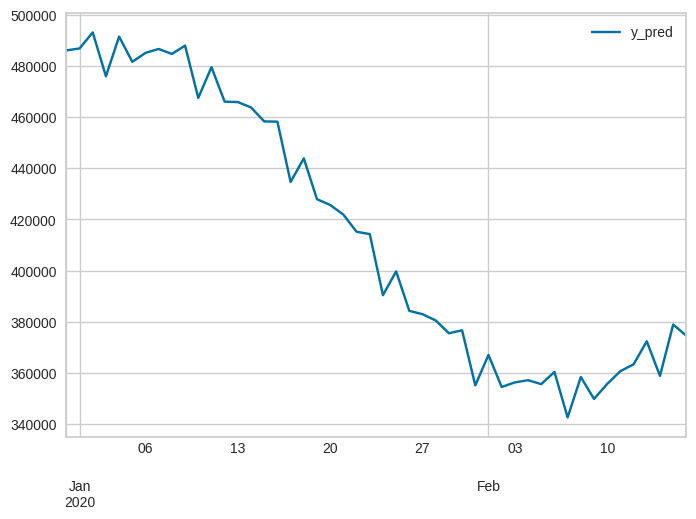

In [ ]:
future_preds = safe_predict(exp_auto, final_auto_model)
future_preds.plot()